In [1]:
%cd /nfs/turbo/coe-mihalcea/alvarovh/code/sciviper/experiments/spectrograms

/nfs/turbo/coe-mihalcea/alvarovh/code/sciviper/experiments/spectrograms


In [3]:
pwd

'/nfs/turbo/coe-mihalcea/alvarovh/code/sciviper/experiments/spectrograms'

In [6]:
import pandas as pd
gpt4results = pd.read_csv("results/AnnotatedSpectrograms_GPT4_results.csv")
sciviperresults = pd.read_csv("results/AnnotatedSpectrograms_SciViper_results.csv")
groundtruth = pd.read_csv("../../data/AnnotatedSpectrograms.csv")

In [7]:
sciviperresults

,index,specs,peak_freq_pred,n_syllables_pred
0,0,210924-071028_uiM_tt_28s.jpg,Exception: 'ImagePatch' object has no attribut...,There are 3 syllables visible in this spectrog...
1,1,210624-094108_1s_uM_tt.jpg,Exception: 'ImagePatch' object has no attribut...,There are 4 syllables visible in this spectrog...
2,2,210707-112111_6s_mie_tt.jpg,Exception: 'ImagePatch' object has no attribut...,There are 6 syllables visible in this spectrog...
3,3,210625-114034_3s_man_tt.jpg,Exception: 'ImagePatch' object has no attribut...,There are 4 syllables visible in this spectrog...
4,4,210914-080445_uafP_tt_1s.jpg,Exception: 'ImagePatch' object has no attribut...,There are 10 syllables visible in this spectro...
5,5,211209-112549_uM_tt_78s.jpg,Exception: 'ImagePatch' object has no attribut...,There are 2 syllables visible in this spectrog...
6,6,220223-075957_25s_uT_tt.jpg,Exception: 'ImagePatch' object has no attribut...,There are 6 syllables visible in this spectrog...
7,7,211103-082228_TAN_tt_1s.jpg,Exception: 'ImagePatch' object has no attribut...,There are 6 syllables visible in this spectrog...
8,8,220120-134001_61s_TRU_tt.jpg,Exception: 'ImagePatch' object has no attribut...,There are 7 syllables visible in this spectrog...
9,9,210924-071430_MEZ_tt_29s.jpg,Exception: 'ImagePatch' object has no attribut...,There are 6 syllables visible in this spectrog...


In [12]:
groundtruth.columns

Index(['wavs_paths', 'peak_frequency', 'specs', 'n_syllables'], dtype='object')

In [11]:
gpt4results.columns

Index(['filename', 'peak_frequency', 'n_syllables'], dtype='object')

In [15]:
sciviperresults = sciviperresults[["peak_freq_pred", "n_syllables_pred"]]
gpt4results = gpt4results[["peak_frequency", "n_syllables"]]
groundtruth = groundtruth[["peak_frequency", "n_syllables"]]

# Extract numeric predictions from the text for SciViper
sciviperresults["peak_freq_pred"] = sciviperresults["peak_freq_pred"].str.extract(r"(\d+)")
sciviperresults["n_syllables_pred"] = sciviperresults["n_syllables_pred"].str.extract(r"(\d+)")

m = pd.merge(gpt4results, sciviperresults, left_index=True, right_index=True)
m.columns = ["gpt4_peak_freq", "gpt4_n_syllables", "sciviper_peak_freq", "sciviper_n_syllables"]
m = pd.merge(m, groundtruth, left_index=True, right_index=True)

m.columns = ["gpt4_peak_freq", "gpt4_n_syllables", "sciviper_peak_freq", "sciviper_n_syllables", "groundtruth_peak_freq", "groundtruth_n_syllables"]

m

,gpt4_peak_freq,gpt4_n_syllables,sciviper_peak_freq,sciviper_n_syllables,groundtruth_peak_freq,groundtruth_n_syllables
0,1000,1,NaN,3,1500.000,1.0
1,10000,3,NaN,4,10265.625,3.0
2,7500,3,NaN,6,6468.750,6.0
3,10000,2,NaN,4,8625.000,5.0
4,10000,7,NaN,10,9703.125,7.0
5,1804,0,NaN,2,1312.500,1.0
6,5000,2,NaN,6,6046.875,1.0
7,5000,4,NaN,6,4265.625,6.0
8,11000,5,NaN,7,10875.000,5.0
9,2500,1,NaN,6,3468.750,7.0


In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_true = m["groundtruth_n_syllables"].astype(float)
y_pred_gpt4 = m["gpt4_n_syllables"].astype(float)
y_pred_sciviper = m["sciviper_n_syllables"].astype(float)

# Calculate metrics for GPT-4
gpt4_mse = mean_squared_error(y_true, y_pred_gpt4)
gpt4_mae = mean_absolute_error(y_true, y_pred_gpt4)
gpt4_r2 = r2_score(y_true, y_pred_gpt4)

# Calculate metrics for SciViper
sciviper_mse = mean_squared_error(y_true, y_pred_sciviper)
sciviper_mae = mean_absolute_error(y_true, y_pred_sciviper)
sciviper_r2 = r2_score(y_true, y_pred_sciviper)

# compare to random guess bounded to min and max of ground truth
min_val = y_true.min()
max_val = y_true.max()


np.random.seed(42)
y_rand = np.random.randint(min_val, max_val, size=len(y_true))
# Calculate metrics for random guess
rand_mse = mean_squared_error(y_true, y_rand)
rand_mae = mean_absolute_error(y_true, y_rand)
rand_r2 = r2_score(y_true, y_rand)



In [66]:

# make it a dataframe to print the latex table
import pandas as pd

metrics = {
    "Model": ["GPT-4", "SciViper", "Random Guess"],
    "MSE": [gpt4_mse, sciviper_mse, rand_mse],
    "MAE": [gpt4_mae, sciviper_mae, rand_mae],
    "R2": [gpt4_r2, sciviper_r2, rand_r2]
}
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.set_index("Model")
metrics_df = metrics_df.round(2)
metrics_df = metrics_df.rename_axis("Model")
metrics_df = metrics_df.rename_axis("Model", axis=1)
metrics_df = metrics_df.rename(columns={"MSE": "MSE", "MAE": "MAE", "R2": "$R^2$"})
# Print the LaTeX table
latex_table = metrics_df.to_latex(escape=False, index=True, float_format="%.2f")

print(latex_table)

\begin{tabular}{lrrr}
\toprule
Model & MSE & MAE & $R^2$ \\
Model &  &  &  \\
\midrule
GPT-4 & 6.67 & 2.07 & 0.27 \\
SciViper & 6.73 & 2.00 & 0.26 \\
Random Guess & 29.23 & 4.37 & -2.21 \\
\bottomrule
\end{tabular}



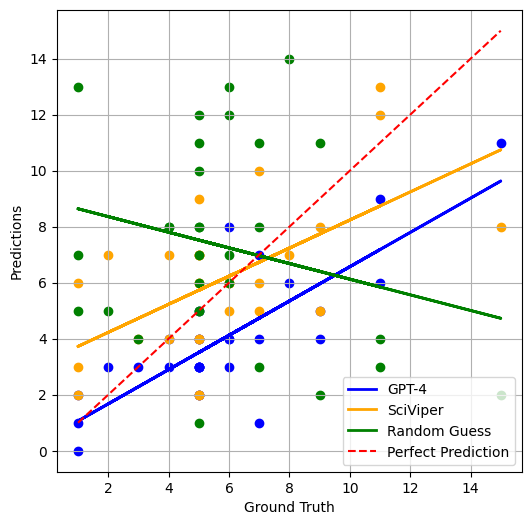

In [68]:
# lets make a scatter plot of the predictions
plt.figure(figsize=(6, 6))
plt.scatter(y_true.values.ravel(), y_pred_gpt4.values.ravel(), label=None, alpha=1, color='blue')
plt.scatter(y_true.values.ravel(), y_pred_sciviper.values.ravel(), label=None, alpha=1, color='orange')
plt.scatter(y_true.values.ravel(), y_rand.ravel(), label=None, alpha=1, color='green')

# lines per prediction
# compute linear regression line
from sklearn.linear_model import LinearRegression
X = y_true.values.reshape(-1, 1)
y_gpt4 = y_pred_gpt4.values.reshape(-1, 1)
# cast to numeric
y_sciviper = y_pred_sciviper.values.reshape(-1, 1)
y_rand = y_rand.reshape(-1, 1)

reg_gpt4 = LinearRegression().fit(X, y_gpt4)
reg_sciviper = LinearRegression().fit(X, y_sciviper)
reg_rand = LinearRegression().fit(X, y_rand)

plt.plot(X, reg_gpt4.predict(X), color='blue', linewidth=2, label="GPT-4")
plt.plot(X, reg_sciviper.predict(X), color='orange', linewidth=2, label="SciViper")
plt.plot(X, reg_rand.predict(X), color='green', linewidth=2, label="Random Guess")
# plot the line of perfect prediction
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color='red', label="Perfect Prediction")

plt.xlabel("Ground Truth")
plt.ylabel("Predictions")

# plt.title("Predictions vs Ground Truth")
plt.legend()
plt.grid(True)
plt.show()

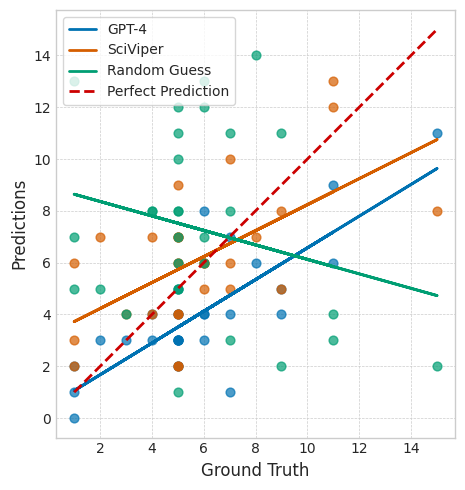

In [73]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Use a professional-looking style
plt.style.use('seaborn-v0_8-whitegrid')  # clean & modern

# Define soft, elegant colors
colors = {
    'gpt4': '#0072B2',       # muted blue
    'sciviper': '#D55E00',   # burnt orange
    'random': '#009E73',     # teal green
    'perfect': '#CC0000'     # dark red
}

plt.figure(figsize=(5, 5))

# Scatter plots (slightly transparent for overlap)
plt.scatter(y_true.values.ravel(), y_pred_gpt4.values.ravel(), label=None, alpha=0.7, color=colors['gpt4'], s=40)
plt.scatter(y_true.values.ravel(), y_pred_sciviper.values.ravel(), label=None, alpha=0.7, color=colors['sciviper'], s=40)
plt.scatter(y_true.values.ravel(), y_rand.ravel(), label=None, alpha=0.7, color=colors['random'], s=40)

# Fit lines
X = y_true.values.reshape(-1, 1)
reg_gpt4 = LinearRegression().fit(X, y_pred_gpt4.values.reshape(-1, 1))
reg_sciviper = LinearRegression().fit(X, y_pred_sciviper.values.reshape(-1, 1))
reg_rand = LinearRegression().fit(X, y_rand.reshape(-1, 1))

plt.plot(X, reg_gpt4.predict(X), color=colors['gpt4'], linewidth=2, label="GPT-4")
plt.plot(X, reg_sciviper.predict(X), color=colors['sciviper'], linewidth=2, label="SciViper")
plt.plot(X, reg_rand.predict(X), color=colors['random'], linewidth=2, label="Random Guess")

# Perfect prediction line
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         linestyle='--', linewidth=2, color=colors['perfect'], label="Perfect Prediction")

# Axis config
plt.xlabel("Ground Truth", fontsize=12)
plt.ylabel("Predictions", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(frameon=True, fontsize=10)

plt.tight_layout()
# plt.show()
# save
plt.savefig("figures/AnnotatedSpectrograms_predictions.png", dpi=300, bbox_inches='tight')
